# Instructions:
To check our regression task, run Load data + manipulate, then go to REGRESSION TASK part (last one)

In [ ]:
%pip install -Uqq transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 125.0 MB/s eta 0:00:00


# Load data + manipulate

In [2]:
# Main df with reviews
import pandas as pd
df = pd.read_excel('nonull_reviews.xlsx')  # Base reviews
#df = pd.read_excel('Augmentation_ver2.xlsx') # Augmented reviews

In [3]:
df[:3]

,Unnamed: 0,date,status,whois,position,average,recommended,row_info,company_name,employees,text_len
0,0,17 октября 2018,Бывший сотрудник,Стаж в компании: от 1 года до 3 лет. Пенза.,Инженер по автоматизации тестирования,Оценка1.3,Рекомендация10%,Можно идти на год только если вы junior и нику...,Bell Integrator,От 1000 до 5000 человек,264
1,1,25 июля 2018,Бывший сотрудник,Стаж в компании: от 3 месяцев до 1 года. Москва.,Фронтенд разработчик,Оценка2.2,Рекомендация20%,Достоинства При большом желании можно хорошо р...,Bell Integrator,От 1000 до 5000 человек,242
2,2,24 июля 2018,Текущий сотрудник,Стаж в компании: от 3 месяцев до 1 года. Москва.,Системный администратор,Оценка2.9,Рекомендация70%,Достоинства Достойная ЗП Недостатки Хаотичный ...,Bell Integrator,От 1000 до 5000 человек,162


In [4]:
import re
def delete_ocenka(text):
  m = re.findall(r'\d+\.\d+', text)
  # print(type(m))
  my_float = float(m[0])
  # print(type(my_float))
  return my_float

In [5]:
df['score']=df['average'].apply(delete_ocenka)
df.drop('average',axis=1,inplace=True)
df[:3]

,Unnamed: 0,date,status,whois,position,recommended,row_info,company_name,employees,text_len,score
0,0,17 октября 2018,Бывший сотрудник,Стаж в компании: от 1 года до 3 лет. Пенза.,Инженер по автоматизации тестирования,Рекомендация10%,Можно идти на год только если вы junior и нику...,Bell Integrator,От 1000 до 5000 человек,264,1.3
1,1,25 июля 2018,Бывший сотрудник,Стаж в компании: от 3 месяцев до 1 года. Москва.,Фронтенд разработчик,Рекомендация20%,Достоинства При большом желании можно хорошо р...,Bell Integrator,От 1000 до 5000 человек,242,2.2
2,2,24 июля 2018,Текущий сотрудник,Стаж в компании: от 3 месяцев до 1 года. Москва.,Системный администратор,Рекомендация70%,Достоинства Достойная ЗП Недостатки Хаотичный ...,Bell Integrator,От 1000 до 5000 человек,162,2.9


In [6]:
df['text']=df['row_info']
df.drop('row_info',axis=1,inplace=True)

In [7]:
# Don't run
# Read IT texts (needed only for MLM)
#df2=pd.read_csv('/content/drive/My Drive/ITtexts/NaturalLanguageProcessing.csv',dtype=str)
#df3=pd.read_csv('/content/drive/My Drive/ITtexts/YandexTeamнанимаетразработчиков.csv',dtype=str)
#df4=pd.read_csv('/content/drive/My Drive/ITtexts/LEFTJOIN.csv',dtype=str)
#df5=pd.read_csv('/content/drive/My Drive/ITtexts/Стойподстрелой.csv',dtype=str)
#df6=pd.read_csv('/content/drive/My Drive/ITtexts/эйайньюз_text.csv',dtype=str)
#df7=pd.read_csv('/content/drive/My Drive/ITtexts/наташинчат.csv',dtype=str)

In [8]:
# Don't run
# Concat them
#frames=[df,df2,df3,df4,df5,df6,df7]
#df_it=pd.concat(frames)

In [9]:
#df_it=pd.read_excel('/content/drive/My Drive/ITtexts/ITEXCEL.xlsx')

In [10]:
df

,Unnamed: 0,date,status,whois,position,recommended,company_name,employees,text_len,score,text
0,0,17 октября 2018,Бывший сотрудник,Стаж в компании: от 1 года до 3 лет. Пенза.,Инженер по автоматизации тестирования,Рекомендация10%,Bell Integrator,От 1000 до 5000 человек,264,1.3,Можно идти на год только если вы junior и нику...
1,1,25 июля 2018,Бывший сотрудник,Стаж в компании: от 3 месяцев до 1 года. Москва.,Фронтенд разработчик,Рекомендация20%,Bell Integrator,От 1000 до 5000 человек,242,2.2,Достоинства При большом желании можно хорошо р...
2,2,24 июля 2018,Текущий сотрудник,Стаж в компании: от 3 месяцев до 1 года. Москва.,Системный администратор,Рекомендация70%,Bell Integrator,От 1000 до 5000 человек,162,2.9,Достоинства Достойная ЗП Недостатки Хаотичный ...
3,3,4 июля 2018,Бывший сотрудник,NaN,Инженер по ручному тестированию,Рекомендация0%,Bell Integrator,От 1000 до 5000 человек,376,2.6,Компания подойдет джунам для старта карьеры и ...
4,4,23 мая 2018,Бывший сотрудник,NaN,NaN,Рекомендация60%,Bell Integrator,От 1000 до 5000 человек,171,3.4,проекты на которых задействованы сотрудники - ...
...,...,...,...,...,...,...,...,...,...,...,...
16927,31774,11 января 2022,Текущий сотрудник,Стаж в компании: от 3 месяцев до 1 года. Москва.,Инженер по ручному тестированию,Рекомендация100%,Яндекс Практикум,От 10 до 100 человек,81,5.0,Достоинства Все обучение построено очень грамо...
16928,31822,14 марта 2023,Текущий сотрудник,Стаж в компании: от 3 месяцев до 1 года. Магни...,Аналитик по данным,Рекомендация80%,Яндекс Практикум,От 10 до 100 человек,60,4.4,Достоинства Интересно и перспективно. Недостат...
16929,31823,13 февраля 2023,Текущий сотрудник,Стаж в компании: от 1 года до 3 лет. Санкт-Пет...,Менеджер по маркетингу,Рекомендация100%,Яндекс Практикум,От 10 до 100 человек,107,5.0,"Здесь классный коллектив, есть возможности для..."
16930,31824,8 февраля 2023,Бывший сотрудник,NaN,NaN,Рекомендация90%,Яндекс Практикум,От 10 до 100 человек,102,4.3,Пока только прошла обучениеДостоинства Пока то...


In [11]:
#df['msg_content']=df['text']

In [12]:
# Delete excess symbols from df_it
#df_it['msg_content'] = df_it['msg_content'].replace(r'[@#$%^&*()]|http\S+', '', regex=True).replace(r'[\u2000-\u3300]|[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F1E0-\U0001F1FF]', '', regex=True).replace(r'\d+', '', regex=True)

In [13]:
#df_it

In [14]:
#df['row_info'][:50]

In [15]:
#df=df[['average','row_info']]

In [17]:
df[:3]

,Unnamed: 0,date,status,whois,position,recommended,company_name,employees,text_len,score,text
0,0,17 октября 2018,Бывший сотрудник,Стаж в компании: от 1 года до 3 лет. Пенза.,Инженер по автоматизации тестирования,Рекомендация10%,Bell Integrator,От 1000 до 5000 человек,264,1.3,Можно идти на год только если вы junior и нику...
1,1,25 июля 2018,Бывший сотрудник,Стаж в компании: от 3 месяцев до 1 года. Москва.,Фронтенд разработчик,Рекомендация20%,Bell Integrator,От 1000 до 5000 человек,242,2.2,Достоинства При большом желании можно хорошо р...
2,2,24 июля 2018,Текущий сотрудник,Стаж в компании: от 3 месяцев до 1 года. Москва.,Системный администратор,Рекомендация70%,Bell Integrator,От 1000 до 5000 человек,162,2.9,Достоинства Достойная ЗП Недостатки Хаотичный ...


# We have a problem here

In [ ]:
df['score'].value_counts()

5.0    8837
4.8    1897
4.9    1216
4.7     639
4.3     523
4.6     497
4.5     417
4.4     301
4.2     215
4.0     212
3.8     206
3.3     179
4.1     153
3.9     137
3.7     112
2.8     110
3.4      94
3.6      92
3.5      89
1.0      83
2.3      78
3.2      77
2.7      70
2.9      70
3.0      66
3.1      56
2.6      56
1.8      51
2.5      50
2.2      49
2.1      45
1.3      40
2.0      37
2.4      34
1.7      31
1.9      30
1.6      22
1.5      20
1.2      16
1.4      14
1.1      11
Name: score, dtype: int64

In [ ]:
(df['score']!=5.0).value_counts()

False    8837
True     8095
Name: score, dtype: int64

<Axes: >

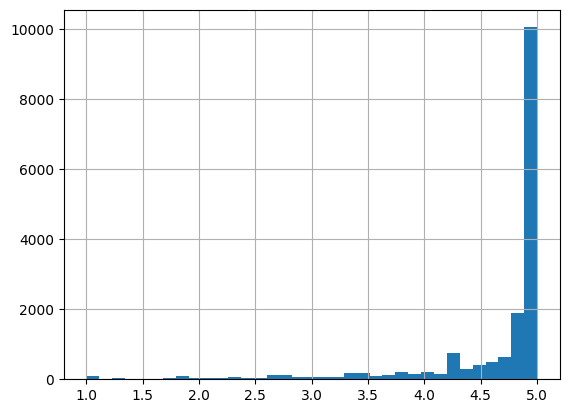

In [ ]:
df['score'].hist(bins=35)

In [ ]:
df['label'] = pd.qcut(df['score'], [0, 0.333, 0.667, 1], duplicates='drop')

In [ ]:
df

,row_info,score,label
0,Можно идти на год только если вы junior и нику...,1.3,"(0.999, 4.8]"
1,Достоинства При большом желании можно хорошо р...,2.2,"(0.999, 4.8]"
2,Достоинства Достойная ЗП Недостатки Хаотичный ...,2.9,"(0.999, 4.8]"
3,Компания подойдет джунам для старта карьеры и ...,2.6,"(0.999, 4.8]"
4,проекты на которых задействованы сотрудники - ...,3.4,"(0.999, 4.8]"
...,...,...,...
16927,Достоинства Все обучение построено очень грамо...,5.0,"(4.8, 5.0]"
16928,Достоинства Интересно и перспективно. Недостат...,4.4,"(0.999, 4.8]"
16929,"Здесь классный коллектив, есть возможности для...",5.0,"(4.8, 5.0]"
16930,Пока только прошла обучениеДостоинства Пока то...,4.3,"(0.999, 4.8]"


In [ ]:
df['score'].value_counts(normalize=True)

5.0    0.521911
4.8    0.112036
4.9    0.071817
4.7    0.037739
4.3    0.030888
4.6    0.029353
4.5    0.024628
4.4    0.017777
4.2    0.012698
4.0    0.012521
3.8    0.012166
3.3    0.010572
4.1    0.009036
3.9    0.008091
3.7    0.006615
2.8    0.006497
3.4    0.005552
3.6    0.005433
3.5    0.005256
1.0    0.004902
2.3    0.004607
3.2    0.004548
2.7    0.004134
2.9    0.004134
3.0    0.003898
3.1    0.003307
2.6    0.003307
1.8    0.003012
2.5    0.002953
2.2    0.002894
2.1    0.002658
1.3    0.002362
2.0    0.002185
2.4    0.002008
1.7    0.001831
1.9    0.001772
1.6    0.001299
1.5    0.001181
1.2    0.000945
1.4    0.000827
1.1    0.000650
Name: score, dtype: float64

<Axes: >

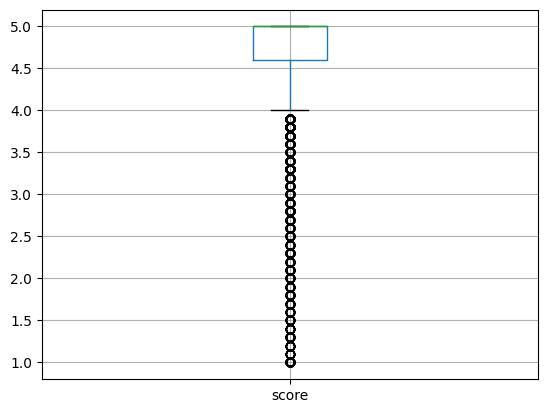

In [ ]:
df.boxplot(column='score')

In [ ]:
pd.value_counts??

In [ ]:
df_no_5=df[df['score']!=5.0]

<Axes: >

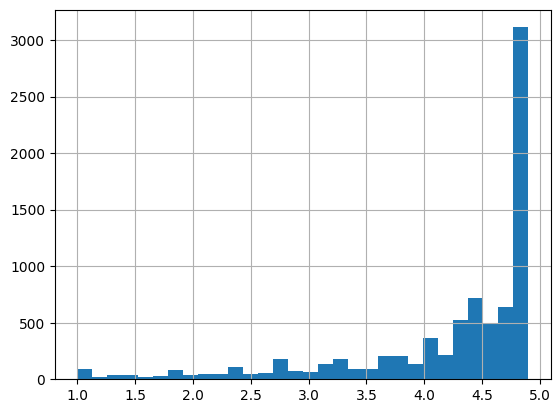

In [ ]:
df_no_5['score'].hist(bins=30)


In [ ]:
df_no_5['score'].value_counts(normalize=True)


4.8    0.234342
4.9    0.150216
4.7    0.078938
4.3    0.064608
4.6    0.061396
4.5    0.051513
4.4    0.037183
4.2    0.026560
4.0    0.026189
3.8    0.025448
3.3    0.022112
4.1    0.018901
3.9    0.016924
3.7    0.013836
2.8    0.013589
3.4    0.011612
3.6    0.011365
3.5    0.010994
1.0    0.010253
2.3    0.009636
3.2    0.009512
2.9    0.008647
2.7    0.008647
3.0    0.008153
2.6    0.006918
3.1    0.006918
1.8    0.006300
2.5    0.006177
2.2    0.006053
2.1    0.005559
1.3    0.004941
2.0    0.004571
2.4    0.004200
1.7    0.003830
1.9    0.003706
1.6    0.002718
1.5    0.002471
1.2    0.001977
1.4    0.001729
1.1    0.001359
Name: score, dtype: float64

In [ ]:
df_no_5['score'].value_counts()


4.8    1897
4.9    1216
4.7     639
4.3     523
4.6     497
4.5     417
4.4     301
4.2     215
4.0     212
3.8     206
3.3     179
4.1     153
3.9     137
3.7     112
2.8     110
3.4      94
3.6      92
3.5      89
1.0      83
2.3      78
3.2      77
2.9      70
2.7      70
3.0      66
2.6      56
3.1      56
1.8      51
2.5      50
2.2      49
2.1      45
1.3      40
2.0      37
2.4      34
1.7      31
1.9      30
1.6      22
1.5      20
1.2      16
1.4      14
1.1      11
Name: score, dtype: int64

<Axes: >

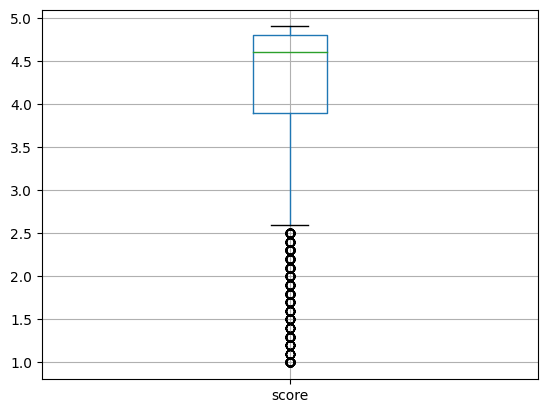

In [ ]:
df_no_5.boxplot(column='score')

In [ ]:
df_4_8=df_no_5[df_no_5['score']!=4.8]

In [ ]:
df_4_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6198 entries, 0 to 16930
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_info  6198 non-null   object 
 1   score     6198 non-null   float64
dtypes: float64(1), object(1)
memory usage: 145.3+ KB


<Axes: >

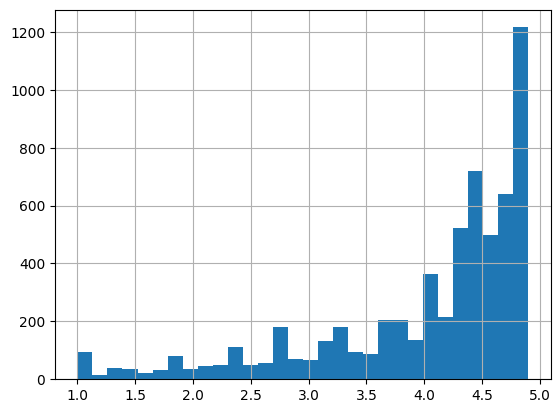

In [ ]:
df_4_8['score'].hist(bins=30)

In [ ]:
df_4_8['score'].value_counts(normalize=True)

4.9    0.196192
4.7    0.103098
4.3    0.084382
4.6    0.080187
4.5    0.067280
4.4    0.048564
4.2    0.034689
4.0    0.034205
3.8    0.033237
3.3    0.028880
4.1    0.024685
3.9    0.022104
3.7    0.018070
2.8    0.017748
3.4    0.015166
3.6    0.014843
3.5    0.014359
1.0    0.013391
2.3    0.012585
3.2    0.012423
2.9    0.011294
2.7    0.011294
3.0    0.010649
2.6    0.009035
3.1    0.009035
1.8    0.008228
2.5    0.008067
2.2    0.007906
2.1    0.007260
1.3    0.006454
2.0    0.005970
2.4    0.005486
1.7    0.005002
1.9    0.004840
1.6    0.003550
1.5    0.003227
1.2    0.002581
1.4    0.002259
1.1    0.001775
Name: score, dtype: float64

In [ ]:
import seaborn as sns

sns.boxplot(x='label',y=1, data=df,orient='v')

AttributeError: ignored

<Axes: >

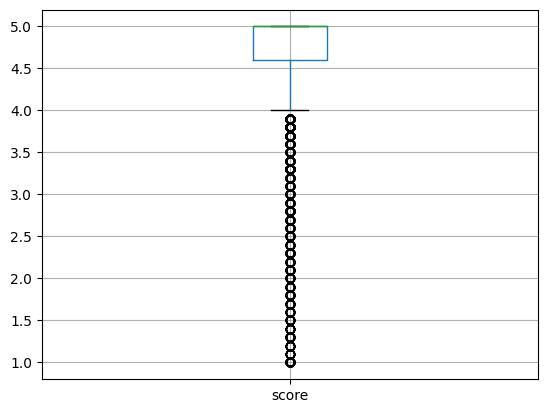

In [ ]:
df.boxplot(column='score')

In [ ]:
df.boxplot??

# Make dummy var (5 = 1; else = 0) (for classif task)

In [ ]:
df

,row_info,score
0,Можно идти на год только если вы junior и нику...,1.3
1,Достоинства При большом желании можно хорошо р...,2.2
2,Достоинства Достойная ЗП Недостатки Хаотичный ...,2.9
3,Компания подойдет джунам для старта карьеры и ...,2.6
4,проекты на которых задействованы сотрудники - ...,3.4
...,...,...
16927,Достоинства Все обучение построено очень грамо...,5.0
16928,Достоинства Интересно и перспективно. Недостат...,4.4
16929,"Здесь классный коллектив, есть возможности для...",5.0
16930,Пока только прошла обучениеДостоинства Пока то...,4.3


In [ ]:
def label(x):
  if x==5.0:
    label=1
  else:
    label=0
  return label

In [ ]:
df['label']=df['score'].apply(label)

<ipython-input-61-2494822a6dad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label']=df['score'].apply(label)


In [ ]:
df

,row_info,score,label
0,Можно идти на год только если вы junior и нику...,1.3,0
1,Достоинства При большом желании можно хорошо р...,2.2,0
2,Достоинства Достойная ЗП Недостатки Хаотичный ...,2.9,0
3,Компания подойдет джунам для старта карьеры и ...,2.6,0
4,проекты на которых задействованы сотрудники - ...,3.4,0
...,...,...,...
16927,Достоинства Все обучение построено очень грамо...,5.0,1
16928,Достоинства Интересно и перспективно. Недостат...,4.4,0
16929,"Здесь классный коллектив, есть возможности для...",5.0,1
16930,Пока только прошла обучениеДостоинства Пока то...,4.3,0


In [ ]:
df['label'].value_counts()

1    8837
0    8095
Name: label, dtype: int64

In [ ]:
df=df[['label','row_info']]
df['text']=df['row_info']
df.drop('row_info',axis=1,inplace=True)

KeyError: ignored

In [ ]:
df

,score,text
0,1.3,Можно идти на год только если вы junior и нику...
1,2.2,Достоинства При большом желании можно хорошо р...
2,2.9,Достоинства Достойная ЗП Недостатки Хаотичный ...
3,2.6,Компания подойдет джунам для старта карьеры и ...
4,3.4,проекты на которых задействованы сотрудники - ...
...,...,...
16927,5.0,Достоинства Все обучение построено очень грамо...
16928,4.4,Достоинства Интересно и перспективно. Недостат...
16929,5.0,"Здесь классный коллектив, есть возможности для..."
16930,4.3,Пока только прошла обучениеДостоинства Пока то...


In [ ]:
### Example from hug face ###
import torch
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny2")
model = AutoModel.from_pretrained("cointegrated/rubert-tiny2")
# model.cuda()  # uncomment it if you have a GPU

def embed_bert_cls(text, model, tokenizer):
    t = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**{k: v.to(model.device) for k, v in t.items()})
    embeddings = model_output.last_hidden_state[:, 0, :]
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].cpu().numpy()

print(embed_bert_cls('привет мир', model, tokenizer).shape)

ModuleNotFoundError: ignored

In [ ]:
# Make short df
df_s=df[:50]

In [ ]:
texts=df_s['row_info'].tolist()
texts

['Можно идти на год только если вы junior и никуда больше не берута потом бегитекак можно быстрееДостоинства\nОчень легко попасть\nМаленькая нагрузкаНедостатки\nНет возможности расти профессионально\nНеграмотное руководство\nСерая зарплата\nОтсутствие премий и бонусов',
 'ДостоинстваПри большом желании можно хорошо развернуться в плане внедрения новых практик и получения на этом опыта. Руководство идёт на это не охотноно простор для внедрений обширный.НедостаткиПлохой офисразброд и шатания. Задержки по ЗП.',
 'ДостоинстваДостойная ЗПНедостаткиХаотичный менеджмент,\xa0паник девелопмент,\xa0хроническое отсутствие планирования. Героическая борьба с проблемами в последний момент.',
 'Компания подойдет джунам для старта карьеры и получения первого опытаостальным не рекомендую.Достоинства\nОфис;\nПроекты (но не все);\nКоллектив;\nЕсть возможность иногда работать удаленно.Недостатки\nЧастично серая ЗП;\nЗП не повышаютлибо повышают на копейки;\nСтабильные задержки при выдаче ЗП;\nЕсть неоплачи

In [ ]:
import time


In [ ]:
%timeit
a=embed_bert_cls(texts,model=model, tokenizer=tokenizer)

In [ ]:
a

array([ 1.67374820e-01,  2.22872049e-02, -4.50277552e-02, -6.82696924e-02,
        2.73582395e-02,  5.95167140e-03, -7.04584131e-03, -5.50741442e-02,
        4.10267077e-02, -1.62190646e-02,  4.01764773e-02,  1.47410268e-02,
        5.89800365e-02,  3.00274603e-02,  5.21459058e-02, -2.89239027e-02,
        4.32156399e-02, -7.89652839e-02,  4.12550122e-02,  1.72487702e-02,
        2.41563506e-02, -2.49235444e-02, -2.36710124e-02, -3.80489416e-02,
        9.42151621e-02,  6.78591132e-02,  4.39518094e-02,  4.22251374e-02,
        1.44031066e-02, -3.07540614e-02, -2.75242701e-02,  4.80089411e-02,
        3.08808032e-02, -5.67931086e-02,  5.88340685e-03, -8.42516893e-04,
       -2.54550315e-02,  7.29616452e-03,  8.85440260e-02,  7.75559293e-03,
        6.83456101e-03,  1.77497059e-01,  8.53173509e-02, -4.38402034e-03,
       -1.33664059e-02, -4.50323755e-03, -5.38069680e-02, -4.67844829e-02,
       -1.28780808e-02,  4.81824726e-02,  6.96292669e-02,  4.63036355e-03,
       -3.29999626e-02,  

In [ ]:
## 1805 from bing chat
# Import the libraries
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset

# Load the tokenizer and the model
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny2")  
model = AutoModelForSequenceClassification.from_pretrained("cointegrated/rubert-tiny2", num_labels=2) # Assuming 2 classes: 1 and 0

# Load your dataset and split into train and test
dataset = load_dataset("your_dataset") # Replace with your dataset name or path
train_dataset = dataset["train"]
test_dataset = dataset["test"]

# Tokenize the texts and prepare them for the model
def preprocess(example):
  return tokenizer(example["text"], truncation=True)

train_dataset = train_dataset.map(preprocess, batched=True)
test_dataset = test_dataset.map(preprocess, batched=True)

# Define the training arguments
training_args = TrainingArguments(
    output_dir="output",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    logging_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    weight_decay=0.01,
)

# Define the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

# Evaluate the model
trainer.evaluate()

# Save the model
trainer.save_model("rubert-tiny2-sentiment")

# Try from YT "NLP | Fine Tuning BERT to perform Spam Classification"... low f1
https://www.youtube.com/watch?v=mw7ay38--ak
NLP | Fine Tuning BERT to perform Spam Classification

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast, AutoTokenizer, BertForSequenceClassification

# specify GPU
device = torch.device("cuda")

In [ ]:
df

,row_info,score,label
0,Можно идти на год только если вы junior и нику...,1.3,"(0.999, 4.8]"
1,Достоинства При большом желании можно хорошо р...,2.2,"(0.999, 4.8]"
2,Достоинства Достойная ЗП Недостатки Хаотичный ...,2.9,"(0.999, 4.8]"
3,Компания подойдет джунам для старта карьеры и ...,2.6,"(0.999, 4.8]"
4,проекты на которых задействованы сотрудники - ...,3.4,"(0.999, 4.8]"
...,...,...,...
16927,Достоинства Все обучение построено очень грамо...,5.0,"(4.8, 5.0]"
16928,Достоинства Интересно и перспективно. Недостат...,4.4,"(0.999, 4.8]"
16929,"Здесь классный коллектив, есть возможности для...",5.0,"(4.8, 5.0]"
16930,Пока только прошла обучениеДостоинства Пока то...,4.3,"(0.999, 4.8]"


In [ ]:
df=df[['label','row_info']]
df['text']=df['row_info']
df.drop('row_info',axis=1,inplace=True)

In [ ]:
df

,label,text
0,"(0.999, 4.8]",Можно идти на год только если вы junior и нику...
1,"(0.999, 4.8]",Достоинства При большом желании можно хорошо р...
2,"(0.999, 4.8]",Достоинства Достойная ЗП Недостатки Хаотичный ...
3,"(0.999, 4.8]",Компания подойдет джунам для старта карьеры и ...
4,"(0.999, 4.8]",проекты на которых задействованы сотрудники - ...
...,...,...
16927,"(4.8, 5.0]",Достоинства Все обучение построено очень грамо...
16928,"(0.999, 4.8]",Достоинства Интересно и перспективно. Недостат...
16929,"(4.8, 5.0]","Здесь классный коллектив, есть возможности для..."
16930,"(0.999, 4.8]",Пока только прошла обучениеДостоинства Пока то...


In [ ]:
df['label'].value_counts(normalize = True)

(4.8, 5.0]      0.593728
(0.999, 4.8]    0.406272
Name: label, dtype: float64

Split train dataset into train, validation and test sets

In [ ]:
train_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['label'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=df['label'])

In [ ]:
 #we will use temp_text and temp_labels to create validation and test set
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

Import BERT Model and BERT Tokenizer

In [ ]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('cointegrated/rubert-tiny2') # Or AutoModel

# Load the BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny2")

Some weights of the model checkpoint at cointegrated/rubert-tiny2 were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# sample data
text = ["привет", "Привет"]

# encode text
sent_id = tokenizer.batch_encode_plus(text, padding=True, return_token_type_ids=False)


In [ ]:
print(sent_id)

{'input_ids': [[2, 32840, 3], [2, 51343, 3]], 'attention_mask': [[1, 1, 1], [1, 1, 1]]}


Tokenization

<Axes: >

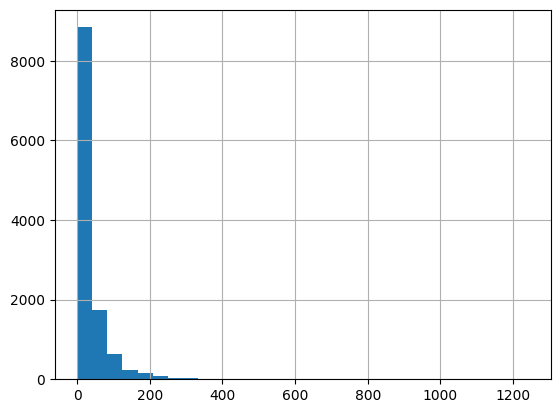

In [ ]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
train_text

3564     При всех недостатках, это одна из самых комфор...
11775    Место, где тебе покажут как можно заработать, ...
12075    Достоинства Крутая компания, заботящаяся о сво...
11678    Достоинства Обширный перечень задач и проектов...
621      Все очень зависит от проекта, от команды.Досто...
                               ...                        
15945    Достоинства Возможности для роста и развития, ...
1207             Воруют еду из холодильников в кафетериях.
2451     Достоинства -Сильная корпоративная культура-Во...
5446     Достоинства Компания заботится о людях, прокач...
3120     Достоинства Коллектив Недостатки Не самые комф...
Name: text, Length: 11852, dtype: object

In [ ]:
max_seq_len = 100

In [ ]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)
     

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Convert Integer Sequences to Tensors

In [ ]:
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

# for validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

Create DataLoaders

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

Freeze BERT Parameters

In [ ]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

Define Model Architecture

In [ ]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      # dropout layer
      self.dropout = nn.Dropout(0.1)
      
      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(312,512) # (768,512)
      
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False) # fixed thanks to 
      #https://stackoverflow.com/questions/65082243/dropout-argument-input-position-1-must-be-tensor-not-str-when-using-bert
      
      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)
      
      # apply softmax activation
      x = self.softmax(x)

      return x

In [ ]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [ ]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Find Class Weights

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_wts = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)

print(class_wts)

[1.04588775 0.95796961]


In [ ]:
# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 10

Fine-Tune BERT

In [ ]:
# function to train the model
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
 
    sent_id, mask, labels = batch

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [ ]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
      #elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

Start Model Training

In [ ]:
import datetime
import time

# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10


ValueError: ignored

In [ ]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [ ]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

# CLASSSIF TASK Try from "Fine Tune Transformers Model like BERT on Custom Dataset."
https://www.youtube.com/watch?v=9he4XKqqzvE
Fine Tune Transformers Model like BERT on Custom Dataset.

In [ ]:
!pip install transformers -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!unzip CustomModels

Archive:  CustomModels.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of CustomModels or
        CustomModels.zip, and cannot find CustomModels.ZIP, period.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
from transformers import TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
#tokenizer = BertTokenizer.from_pretrained('cointegrated/rubert-tiny2')
#model = BertForSequenceClassification.from_pretrained('cointegrated/rubert-tiny2',num_labels=2)
tokenizer = BertTokenizer.from_pretrained('CustomModels/CustomMLM')
model = BertForSequenceClassification.from_pretrained('CustomModels/CustomMLM',num_labels=2)
#path = 'model_weights2.pth'
#model.load_state_dict(torch.load(path)) # Don't forget to # if want use base rubert

Some weights of the model checkpoint at CustomModels/CustomMLM were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at CustomModels/CustomMLM

In [ ]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(83828, 312, padding_idx=0)
      (position_embeddings): Embedding(2048, 312)
      (token_type_embeddings): Embedding(2, 312)
      (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-2): 3 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=312, out_features=312, bias=True)
              (key): Linear(in_features=312, out_features=312, bias=True)
              (value): Linear(in_features=312, out_features=312, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=312, out_features=312, bias=True)
              (LayerNorm): LayerNorm((312,), eps=1e-12, 

In [ ]:
model = model.to('cuda')

In [ ]:
sample_data = ["Я люблю сбербанк","Я ненавижу сбербанк"]
tokenizer(sample_data, padding=True, truncation=True, max_length=512)

{'input_ids': [[2, 311, 32988, 65683, 36042, 3], [2, 311, 80244, 65683, 36042, 3]], 'token_type_ids': [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}

In [ ]:
df

,label,text
0,0,Можно идти на год только если вы junior и нику...
1,0,Достоинства При большом желании можно хорошо р...
2,0,Достоинства Достойная ЗП Недостатки Хаотичный ...
3,0,Компания подойдет джунам для старта карьеры и ...
4,0,проекты на которых задействованы сотрудники - ...
...,...,...
16927,1,Достоинства Все обучение построено очень грамо...
16928,0,Достоинства Интересно и перспективно. Недостат...
16929,1,"Здесь классный коллектив, есть возможности для..."
16930,0,Пока только прошла обучениеДостоинства Пока то...


In [ ]:
X = list(df["text"])
y = list(df["label"])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,stratify=y)
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=512)

In [ ]:
X_train_tokenized.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
print(X_train_tokenized['attention_mask'][0])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
len(X_train),len(X_val)

(13545, 3387)

In [ ]:
# Create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

In [ ]:
train_dataset = Dataset(X_train_tokenized, y_train)
val_dataset = Dataset(X_val_tokenized, y_val)

In [ ]:
train_dataset[4]

{'input_ids': tensor([    2, 77098,  2014, 25919,  9558,    16, 10030, 75206, 34418,   319,
          1231,    16, 39880, 30140,    16, 35681, 30821,   320, 23411, 18708,
            16,  4064, 40816, 21965,    16, 41409, 35824,   314, 13421,     3,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,   

In [ ]:
def compute_metrics(p):
    print(type(p))
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [ ]:
pip install --upgrade accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 12.1 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y transformers accelerate
!pip install transformers accelerate

Found existing installation: transformers 4.29.2
Uninstalling transformers-4.29.2:
  Successfully uninstalled transformers-4.29.2
Found existing installation: accelerate 0.19.0
Uninstalling accelerate-0.19.0:
  Successfully uninstalled accelerate-0.19.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.29.2-py3-none-any.whl (7.1 MB)
  Using cached accelerate-0.19.0-py3-none-any.whl (219 kB)


In [ ]:
# Define Trainer
args = TrainingArguments(
    output_dir="output",
    num_train_epochs=3,
    per_device_train_batch_size=16

)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,0.591400
1000,0.527200
1500,0.481100
2000,0.443400
2500,0.419400


TrainOutput(global_step=2541, training_loss=0.49158053827867504, metrics={'train_runtime': 331.4422, 'train_samples_per_second': 122.601, 'train_steps_per_second': 7.666, 'total_flos': 299650900469760.0, 'train_loss': 0.49158053827867504, 'epoch': 3.0})

In [ ]:
  trainer.evaluate()

<class 'transformers.trainer_utils.EvalPrediction'>


{'eval_loss': 0.5343013405799866,
 'eval_accuracy': 0.7508119279598465,
 'eval_precision': 0.7319277108433735,
 'eval_recall': 0.8246606334841629,
 'eval_f1': 0.775531914893617,
 'eval_runtime': 9.6701,
 'eval_samples_per_second': 350.255,
 'eval_steps_per_second': 43.847,
 'epoch': 3.0}

Image of trainer

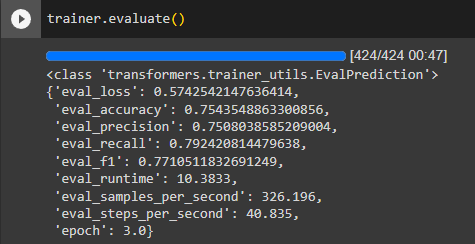

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
text = "Даже, если вы чего то не знаете или не до понимаете, то можно всегда обратиться за помощью к любому сотруднику Достоинства Дружелюбный коллектив, интересные задачи, профессиональный рост1"
# text = "go to hell"
inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt').to('cuda')
outputs = model(**inputs)
print(outputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)
predictions = predictions.cpu().detach().numpy()
predictions
     

SequenceClassifierOutput(loss=None, logits=tensor([[-0.4977,  0.6525]], device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
tensor([[0.2405, 0.7595]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


array([[0.24045102, 0.759549  ]], dtype=float32)

In [ ]:
trainer.save_model('CustomModel')

In [ ]:
# trainer.save_model('/content/drive/MyDrive/Youtube Tutorials/toxic')
# model_2 = BertForSequenceClassification.from_pretrained("/content/drive/MyDrive/Youtube Tutorials/toxic")
# model_2.to('cuda')

In [ ]:
model_2 = BertForSequenceClassification.from_pretrained("CustomModel")
model_2.to('cuda')

# MLM TASK Training BERT 2 - Train With Masked-Language Modeling (MLM) (DONE IN COLAB, HAVE COPY IN THIS REPO)
Try feed more texts

https://www.youtube.com/watch?v=R6hcxMMOrPE

https://github.com/jamescalam/transformers/blob/main/course/training/03_mlm_training.ipynb

In [ ]:
from transformers import BertTokenizer, BertForMaskedLM
import torch

tokenizer = BertTokenizer.from_pretrained('cointegrated/rubert-tiny2')
model = BertForMaskedLM.from_pretrained('cointegrated/rubert-tiny2')

Some weights of the model checkpoint at cointegrated/rubert-tiny2 were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Try feed it with our own data

In [ ]:
#df
#text=df['text'].tolist()
text=df_it['msg_content'].tolist()

In [ ]:
df_it

,msg_content
0,Для интересующихся: прогнал natasha через тес...
1,"Чуть-чуть допилил правила, теперь результаты т..."
2,"Ребят, подскажите тупню, как из текста вытащит..."
3,Привет. Можно переиспользовать существующие гр...
4,Огромное спасибо!
...,...
52344,"Кстати, я тут использовал плагины ChatGPT, что..."
52345,"​​🎙Онлайн-подкаст с Артемом, автором эйай ньюз..."
52346,В прошлый раз не получилось заранее вас предуп...
52347,Стрим пошел! Подключайтесь UPD: На днях будет...


In [ ]:
df_it = df_it.reset_index(drop=True)
df_it.drop('msg_id',axis=1,inplace=True)

In [ ]:
for i in text:
  print(text[i].isdigit())

TypeError: ignored

In [ ]:
text

['Можно идти на год только если вы junior и никуда больше не берут, а потом бегите, как можно быстрееДостоинства \nОчень легко попасть\nМаленькая нагрузка Недостатки \nНет возможности расти профессионально\nНеграмотное руководство\nСерая зарплата\nОтсутствие премий и бонусов',
 'Достоинства При большом желании можно хорошо развернуться в плане внедрения новых практик и получения на этом опыта. Руководство идёт на это не охотно, но простор для внедрений обширный. Недостатки Плохой офис, разброд и шатания. Задержки по ЗП.',
 'Достоинства Достойная ЗП Недостатки Хаотичный менеджмент,\xa0паник девелопмент,\xa0хроническое отсутствие планирования. Героическая борьба с проблемами в последний момент.',
 'Компания подойдет джунам для старта карьеры и получения первого опыта, остальным не рекомендую.Достоинства \nОфис;\nПроекты но не все;\nКоллектив;\nЕсть возможность иногда работать удаленно. Недостатки \nЧастично серая ЗП;\nЗП не повышают, либо повышают на копейки;\nСтабильные задержки при выд

In [ ]:
a=df_it['msg_content']=='NaN'
a.value_counts()

False    52349
Name: msg_content, dtype: int64

In [ ]:
text=[elem.replace('\n',' ').replace('\xa0',' ').replace('  ',' ').strip() for elem in text]

In [ ]:
text

AttributeError: ignored

First, we'll tokenize our text.

In [ ]:
inputs = tokenizer(text, return_tensors='pt', max_length=256, truncation=True, padding='max_length')

In [ ]:
inputs

{'input_ids': tensor([[    2, 30396, 31039,  ...,     0,     0,     0],
        [    2, 77098,  2014,  ...,     0,     0,     0],
        [    2, 77098,  2014,  ...,     0,     0,     0],
        ...,
        [    2,   333, 52103,  ...,     0,     0,     0],
        [    2,  2749, 15047,  ...,     0,     0,     0],
        [    2, 35475,    16,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

Then we create our labels tensor by cloning the input_ids tensor.


In [ ]:
inputs['labels'] = inputs.input_ids.detach().clone()

In [ ]:
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])

Now we mask tokens in the input_ids tensor, using the 15% probability we used before - and the not a CLS or SEP token condition. This time, because we have padding tokens we also need to exclude PAD tokens (0 input ids).

In [ ]:
# create random array of floats with equal dimensions to input_ids tensor
rand = torch.rand(inputs.input_ids.shape)
# create mask array
mask_arr = (rand < 0.15) * (inputs.input_ids != 101) * \
           (inputs.input_ids != 102) * (inputs.input_ids != 0)

In [ ]:
mask_arr

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [ True, False, False,  ..., False, False, False],
        [False, False,  True,  ..., False, False, False]])

And now we take take the indices of each True value, within each individual vector.

In [ ]:
selection = []

for i in range(inputs.input_ids.shape[0]):
    selection.append(
        torch.flatten(mask_arr[i].nonzero()).tolist()
    )

In [ ]:
selection[:5]

[[8, 18, 19, 20, 41, 43, 44, 46],
 [11, 19, 30, 31, 49],
 [4, 7, 11, 32, 33],
 [7, 9, 20, 29, 42, 58, 60, 69],
 [1, 2, 13, 14, 22, 23, 24, 31]]

In [ ]:
for i in range(inputs.input_ids.shape[0]):
    inputs.input_ids[i, selection[i]] = 103


In [ ]:
inputs.input_ids

tensor([[    2,  3760, 70154,  ...,     0,     0,     0],
        [    2, 42749,    17,  ...,     0,     0,     0],
        [    2, 36750,  2434,  ...,     0,     0,     0],
        ...,
        [    2,   282, 42086,  ...,     0,     0,     0],
        [    2, 45947,   103,  ...,     0,     0,     0],
        [    2, 10721, 26629,  ...,     0,     0,     0]])

In [ ]:
class MeditationsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings
    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    def __len__(self):
        return len(self.encodings.input_ids)

In [ ]:
dataset = MeditationsDataset(inputs)

In [ ]:
loader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# and move our model over to the selected device
model.to(device)

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(83828, 312, padding_idx=0)
      (position_embeddings): Embedding(2048, 312)
      (token_type_embeddings): Embedding(2, 312)
      (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-2): 3 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=312, out_features=312, bias=True)
              (key): Linear(in_features=312, out_features=312, bias=True)
              (value): Linear(in_features=312, out_features=312, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=312, out_features=312, bias=True)
              (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_af

In [ ]:
from transformers import AdamW

# activate training mode
model.train()
# initialize optimizer
optim = AdamW(model.parameters(), lr=5e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Takes 12 mins
from tqdm import tqdm  # for our progress bar

epochs = 2

for epoch in range(epochs):
    # setup loop with TQDM and dataloader
    loop = tqdm(loader, leave=True)
    for batch in loop:
        # initialize calculated gradients (from prev step)
        optim.zero_grad()
        # pull all tensor batches required for training
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        # process
        outputs = model(input_ids, attention_mask=attention_mask,
                        labels=labels)
        # extract loss
        loss = outputs.loss
        # calculate loss for every parameter that needs grad update
        loss.backward()
        # update parameters
        optim.step()
        # print relevant info to progress bar
        loop.set_description(f'Epoch {epoch}')
        loop.set_postfix(loss=loss.item())

  0%|          | 0/24742 [00:00<?, ?it/s]<ipython-input-171-6dccb434beb5>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 0:  79%|███████▊  | 19428/24742 [2:25:54<39:54,  2.22it/s, loss=0.128]

 Specify a path

path = 'model_weights.pth'

 Save

torch.save(model.state_dict(), path)

 Load
 
model = BERT_Arch(bert) # create an instance of the same model architecture
model.load_state_dict(torch.load(path)) # load the state_dict
model.eval() # set to evaluation mode

In [ ]:
path = 'model_weights2.pth'
torch.save(model.state_dict(), path)

In [ ]:
model.save_pretrained("CustomModels/CustomMLM_BIG")
tokenizer.save_pretrained("CustomModels/CustomMLM_BIG")

In [ ]:
# Download MLMed model
!zip -r /content/CustomModels.zip /content/CustomModels

	zip warning: name not matched: /content/CustomModels

zip error: Nothing to do! (try: zip -r /content/CustomModels.zip . -i /content/CustomModels)


In [ ]:
!cp -r "/content/custMBIG.zip" "/content/drive/MyDrive/custMBIG.zip"

cp: cannot stat '/content/custMBIG.zip': No such file or directory


In [ ]:
# Specify the path to the zip file on Google Drive
zip_file_path = '/content/drive/MyDrive/CustomModels.zip'

# Specify the path to extract the contents of the zip file
extract_path = '/content/CustomModels'

# Import the required libraries
import zipfile

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Zip file extracted successfully.")

Zip file extracted successfully.


In [ ]:
model.to(device)

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(83828, 312, padding_idx=0)
      (position_embeddings): Embedding(2048, 312)
      (token_type_embeddings): Embedding(2, 312)
      (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-2): 3 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=312, out_features=312, bias=True)
              (key): Linear(in_features=312, out_features=312, bias=True)
              (value): Linear(in_features=312, out_features=312, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=312, out_features=312, bias=True)
              (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_af

In [ ]:
model = BertForMaskedLM.from_pretrained('cointegrated/rubert-tiny2') # create an instance of the same model architecture
model.load_state_dict(torch.load(path)) # load the state_dict

Some weights of the model checkpoint at cointegrated/rubert-tiny2 were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<All keys matched successfully>

In [ ]:
text = "Достоинства Люди. Не каждая компания может похвастаться отзывчивыми и дружелюбными [MASK]."

In [ ]:
from transformers import pipeline

mask_filler = pipeline("fill-mask", model=model,tokenizer=tokenizer)
mask_filler(text, top_k=3)

[{'score': 0.1467834711074829,
  'token': 53959,
  'token_str': 'задачами',
  'sequence': 'Достоинства Люди. Не каждая компания может похвастаться отзывчивыми и дружелюбными задачами.'},
 {'score': 0.10756455361843109,
  'token': 21667,
  'token_str': 'людьми',
  'sequence': 'Достоинства Люди. Не каждая компания может похвастаться отзывчивыми и дружелюбными людьми.'},
 {'score': 0.08215248584747314,
  'token': 40987,
  'token_str': 'условиями',
  'sequence': 'Достоинства Люди. Не каждая компания может похвастаться отзывчивыми и дружелюбными условиями.'}]

Вроде бы результаты новой модели 

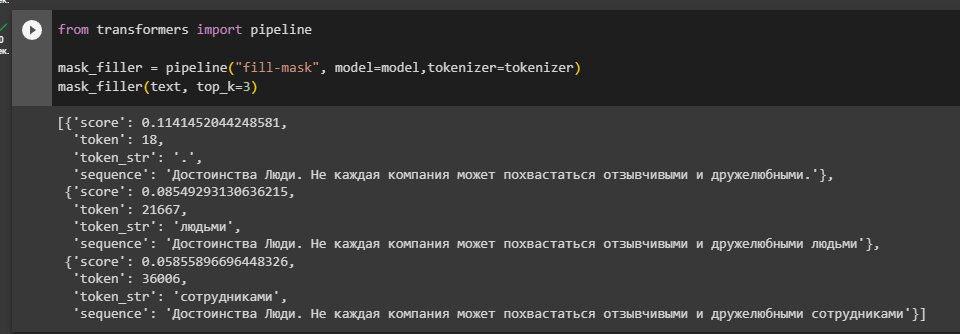

Результаты базовой модели 

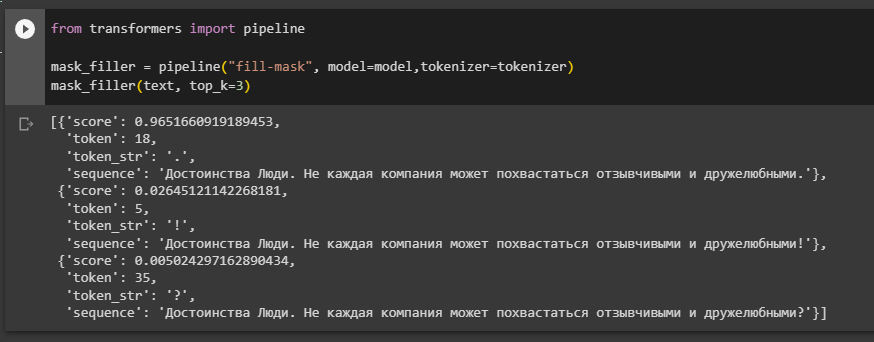

# REGRESSION TASK |Fine-tuning BERT for a regression task: is a description enough to predict a property’s list price?
https://medium.com/ilb-labs-publications/fine-tuning-bert-for-a-regression-task-is-a-description-enough-to-predict-a-propertys-list-price-cf97cd7cb98a


In [ ]:
# To make unbalanced df's scores as integer to compare with augemnted
#df['score'] = df['score'].astype(int)

<ipython-input-11-d3ab78d8e5bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = df['score'].astype(int)


In [18]:
df

,Unnamed: 0,date,status,whois,position,recommended,company_name,employees,text_len,score,text
0,0,17 октября 2018,Бывший сотрудник,Стаж в компании: от 1 года до 3 лет. Пенза.,Инженер по автоматизации тестирования,Рекомендация10%,Bell Integrator,От 1000 до 5000 человек,264,1.3,Можно идти на год только если вы junior и нику...
1,1,25 июля 2018,Бывший сотрудник,Стаж в компании: от 3 месяцев до 1 года. Москва.,Фронтенд разработчик,Рекомендация20%,Bell Integrator,От 1000 до 5000 человек,242,2.2,Достоинства При большом желании можно хорошо р...
2,2,24 июля 2018,Текущий сотрудник,Стаж в компании: от 3 месяцев до 1 года. Москва.,Системный администратор,Рекомендация70%,Bell Integrator,От 1000 до 5000 человек,162,2.9,Достоинства Достойная ЗП Недостатки Хаотичный ...
3,3,4 июля 2018,Бывший сотрудник,NaN,Инженер по ручному тестированию,Рекомендация0%,Bell Integrator,От 1000 до 5000 человек,376,2.6,Компания подойдет джунам для старта карьеры и ...
4,4,23 мая 2018,Бывший сотрудник,NaN,NaN,Рекомендация60%,Bell Integrator,От 1000 до 5000 человек,171,3.4,проекты на которых задействованы сотрудники - ...
...,...,...,...,...,...,...,...,...,...,...,...
16927,31774,11 января 2022,Текущий сотрудник,Стаж в компании: от 3 месяцев до 1 года. Москва.,Инженер по ручному тестированию,Рекомендация100%,Яндекс Практикум,От 10 до 100 человек,81,5.0,Достоинства Все обучение построено очень грамо...
16928,31822,14 марта 2023,Текущий сотрудник,Стаж в компании: от 3 месяцев до 1 года. Магни...,Аналитик по данным,Рекомендация80%,Яндекс Практикум,От 10 до 100 человек,60,4.4,Достоинства Интересно и перспективно. Недостат...
16929,31823,13 февраля 2023,Текущий сотрудник,Стаж в компании: от 1 года до 3 лет. Санкт-Пет...,Менеджер по маркетингу,Рекомендация100%,Яндекс Практикум,От 10 до 100 человек,107,5.0,"Здесь классный коллектив, есть возможности для..."
16930,31824,8 февраля 2023,Бывший сотрудник,NaN,NaN,Рекомендация90%,Яндекс Практикум,От 10 до 100 человек,102,4.3,Пока только прошла обучениеДостоинства Пока то...


In [20]:
df=df[['score','text']]

In [21]:
df[:3]

,score,text
0,1.3,Можно идти на год только если вы junior и нику...
1,2.2,Достоинства При большом желании можно хорошо р...
2,2.9,Достоинства Достойная ЗП Недостатки Хаотичный ...


In [19]:
df.score.value_counts()

5.0    8837
4.8    1897
4.9    1216
4.7     639
4.3     523
4.6     497
4.5     417
4.4     301
4.2     215
4.0     212
3.8     206
3.3     179
4.1     153
3.9     137
3.7     112
2.8     110
3.4      94
3.6      92
3.5      89
1.0      83
2.3      78
3.2      77
2.7      70
2.9      70
3.0      66
3.1      56
2.6      56
1.8      51
2.5      50
2.2      49
2.1      45
1.3      40
2.0      37
2.4      34
1.7      31
1.9      30
1.6      22
1.5      20
1.2      16
1.4      14
1.1      11
Name: score, dtype: int64

In [ ]:
!pip install transformers -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 126.6 MB/s eta 0:00:00


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)
df = train_data[['score', 'text']]

In [23]:
df

,score,text
1143,4.9,"Достоинства Вокруг движуха, много разных мероп..."
1114,4.9,Достоинства Я работаю в организации уже нескол...
4610,4.5,Достоинства Отличный коллективАдекватный и гра...
7775,5.0,Достоинства В этой компании сотрудники сами со...
12742,4.2,В целом в СДЭК приятно работать. Но это не IT ...
...,...,...
11284,4.8,Достоинства комфортные условия труда Недостатк...
11964,1.0,Недостатки Полная финансовая зависимость разр...
5390,5.0,"-Достоинства Соцпакет, ДМС, достойный уровен..."
860,5.0,Достоинства интересные задачи


In [24]:
import re

def remove_space_between_numbers(text):
    text = re.sub(r'(\d)\s+(\d)', r'\1\2', text)
    return text

def filter_emails(text):
    pattern = r'(?:(?!.*?[.]{2})[a-zA-Z0-9](?:[a-zA-Z0-9.+!%-]{1,64}|)|\"[a-zA-Z0-9.+!% -]{1,64}\")@[a-zA-Z0-9][a-zA-Z0-9.-]+(.[a-z]{2,}|.[0-9]{1,})'
    text = re.sub(pattern, '', text)
    return text

def filter_websites(text):
    pattern = r'(http\:\/\/|https\:\/\/)?([a-z0-9][a-z0-9\-]*\.)+[a-z][a-z\-]*'
    text = re.sub(pattern, '', text)
    return text
  
def filter_phone_numbers(text):
    pattern = r'(?:(?:\+|00)33[\s.-]{0,3}(?:\(0\)[\s.-]{0,3})?|0)[1-9](?:(?:[\s.-]?\d{2}){4}|\d{2}(?:[\s.-]?\d{3}){2})|(\d{2}[ ]\d{2}[ ]\d{3}[ ]\d{3})'
    text = re.sub(pattern, '', text)
    return text



def clean_text(text):
    text = text.lower()
    text = text.replace(u'\xa0', u' ')
    text = filter_phone_numbers(text)
    text = filter_emails(text)
    text = filter_websites(text)
    text = remove_space_between_numbers(text)
    return text
df['cleaned_description'] = df.text.apply(clean_text)

In [25]:
df[:3]

,score,text,cleaned_description
1143,4.9,"Достоинства Вокруг движуха, много разных мероп...","достоинства вокруг движуха, много разных мероп..."
1114,4.9,Достоинства Я работаю в организации уже нескол...,достоинства я работаю в организации уже нескол...
4610,4.5,Достоинства Отличный коллективАдекватный и гра...,достоинства отличный коллективадекватный и гра...


In [ ]:
from transformers import BertTokenizer
import torch
# Choose tokenizer
#tokenizer = BertTokenizer.from_pretrained('cointegrated/rubert-tiny2')
tokenizer = BertTokenizer.from_pretrained('CustomModels/CustomModels/CustomMLM_BIG')
encoded_corpus = tokenizer(text=df.cleaned_description.tolist(),
                            add_special_tokens=True,
                            padding='max_length',
                            truncation='longest_first',
                            max_length=300,
                            return_attention_mask=True)
input_ids = encoded_corpus['input_ids']
attention_mask = encoded_corpus['attention_mask']

In [ ]:
import numpy as np
def filter_long_descriptions(tokenizer, descriptions, max_len):
    indices = []
    lengths = tokenizer(descriptions, padding=False, 
                     truncation=False, return_length=True)['length']
    for i in range(len(descriptions)):
        if lengths[i] <= max_len-2:
            indices.append(i)
    return indices
short_descriptions = filter_long_descriptions(tokenizer, 
                               df.cleaned_description.tolist(), 300)
input_ids = np.array(input_ids)[short_descriptions]
attention_mask = np.array(attention_mask)[short_descriptions]
labels = df.score.to_numpy()[short_descriptions]

In [ ]:
from sklearn.model_selection import train_test_split
test_size = 0.1
seed = 42
train_inputs, test_inputs, train_labels, test_labels = \
            train_test_split(input_ids, labels, test_size=test_size, 
                             random_state=seed)
train_masks, test_masks, _, _ = train_test_split(attention_mask, 
                                        labels, test_size=test_size, 
                                        random_state=seed)

In [ ]:
from sklearn.preprocessing import StandardScaler
score_scaler = StandardScaler()
score_scaler.fit(train_labels.reshape(-1, 1))
train_labels = score_scaler.transform(train_labels.reshape(-1, 1))
test_labels = score_scaler.transform(test_labels.reshape(-1, 1))

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
batch_size = 32
def create_dataloaders(inputs, masks, labels, batch_size):
    input_tensor = torch.tensor(inputs, dtype=torch.float32)
    mask_tensor = torch.tensor(masks, dtype=torch.float32)
    labels_tensor = torch.tensor(labels, dtype=torch.float32)
    dataset = TensorDataset(input_tensor, mask_tensor, 
                            labels_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, 
                            shuffle=True)
    return dataloader
train_dataloader = create_dataloaders(train_inputs, train_masks, 
                                      train_labels, batch_size)
test_dataloader = create_dataloaders(test_inputs, test_masks, 
                                     test_labels, batch_size)

In [ ]:
# Model rubert-tiny2
import torch.nn as nn
from transformers import AutoModel
class RubertRegressor(nn.Module):
    
    def __init__(self, drop_rate=0.2, freeze_rubert=False):
        super(RubertRegressor, self).__init__()
        D_in, D_out = 312, 1
        
        self.rubert = \
                   AutoModel.from_pretrained("cointegrated/rubert-tiny2")
        self.regressor = nn.Sequential(
            nn.Dropout(drop_rate),
            nn.Linear(D_in, D_out))
        self.to(device)
    def forward(self, input_ids, attention_masks):
        input_ids = input_ids.to(device, dtype=torch.long)
        attention_masks = attention_masks.to(device, dtype=torch.float32)
        outputs = self.rubert(input_ids, attention_masks)
        class_label_output = outputs[1]
        outputs = self.regressor(class_label_output)
        #outputs = self.rubert(input_ids, attention_masks)
        #class_label_output = outputs[1]
        #outputs = self.regressor(class_label_output)
        return outputs
model = RubertRegressor(drop_rate=0.2)

Some weights of the model checkpoint at cointegrated/rubert-tiny2 were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Our Bert
import torch.nn as nn
from transformers import AutoModel
class RubertRegressor(nn.Module):
    
    def __init__(self, drop_rate=0.2, freeze_rubert=False):
        super(RubertRegressor, self).__init__()
        D_in, D_out = 312, 1
        
        self.rubert = \
                   AutoModel.from_pretrained('CustomModels/CustomModels/CustomMLM_BIG')
        self.regressor = nn.Sequential(
            nn.Dropout(drop_rate),
            nn.Linear(D_in, D_out))
        self.to(device)
    def forward(self, input_ids, attention_masks):
        input_ids = input_ids.to(device, dtype=torch.long)
        attention_masks = attention_masks.to(device, dtype=torch.float32)
        outputs = self.rubert(input_ids, attention_masks)
        class_label_output = outputs[1]
        outputs = self.regressor(class_label_output)
        #outputs = self.rubert(input_ids, attention_masks)
        #class_label_output = outputs[1]
        #outputs = self.regressor(class_label_output)
        return outputs
model = RubertRegressor(drop_rate=0.2)

Some weights of the model checkpoint at CustomModels/CustomModels/CustomMLM_BIG were not used when initializing BertModel: ['cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at CustomModels/CustomModels/CustomMLM_BIG and are newly initialized: ['bert.pooler.dens

In [ ]:
import torch
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print("Using GPU.")
else:
    print("No GPU available, using the CPU instead.")
    device = torch.device("cpu")


Using GPU.


In [ ]:
model.to(device)

RubertRegressor(
  (rubert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(83828, 312, padding_idx=0)
      (position_embeddings): Embedding(2048, 312)
      (token_type_embeddings): Embedding(2, 312)
      (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-2): 3 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=312, out_features=312, bias=True)
              (key): Linear(in_features=312, out_features=312, bias=True)
              (value): Linear(in_features=312, out_features=312, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=312, out_features=312, bias=True)
              (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_

In [ ]:
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr=5e-5,
                  eps=1e-8)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_linear_schedule_with_warmup
epochs = 5
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer,       
                 num_warmup_steps=0, num_training_steps=total_steps)

In [ ]:
loss_function = nn.MSELoss()

In [ ]:
# 17 min on aug data
from torch.nn.utils.clip_grad import clip_grad_norm
def train(model, optimizer, scheduler, loss_function, epochs,       
          train_dataloader, device, clip_value=2):
    for epoch in range(epochs):
        print(epoch)
        print("-----")
        best_loss = 1e10
        model.train()
        for step, batch in enumerate(train_dataloader): 
            print(step)  
            batch_inputs, batch_masks, batch_labels = \
                               tuple(b.to(device) for b in batch)
            model.zero_grad()
            outputs = model(batch_inputs, batch_masks)           
            loss = loss_function(outputs.squeeze(), 
                             batch_labels.squeeze())
            loss.backward()
            clip_grad_norm(model.parameters(), clip_value)
            optimizer.step()
            scheduler.step()
                
    return model
model = train(model, optimizer, scheduler, loss_function, epochs, 
              train_dataloader, device, clip_value=2)

0
-----
0
1


<ipython-input-52-22c172198742>:19: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  clip_grad_norm(model.parameters(), clip_value)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [ ]:
print(train_inputs.dtype)

int64


In [ ]:
def evaluate(model, loss_function, test_dataloader, device):
    model.eval()
    test_loss, test_r2 = [], []
    for batch in test_dataloader:
        batch_inputs, batch_masks, batch_labels = \
                                 tuple(b.to(device) for b in batch)
        with torch.no_grad():
            outputs = model(batch_inputs, batch_masks)
        loss = loss_function(outputs, batch_labels)
        test_loss.append(loss.item())
        r2 = r2_score(outputs, batch_labels)
        test_r2.append(r2.item())
    return test_loss, test_r2
def r2_score(outputs, labels):
    labels_mean = torch.mean(labels)
    ss_tot = torch.sum((labels - labels_mean) ** 2)
    ss_res = torch.sum((labels - outputs) ** 2)
    r2 = 1 - ss_res / ss_tot
    return r2

In [ ]:
def predict(model, dataloader, device):
    model.eval()
    output = []
    for batch in dataloader:
        batch_inputs, batch_masks, _ = \
                                  tuple(b.to(device) for b in batch)
        with torch.no_grad():
            output += model(batch_inputs, 
                            batch_masks).view(1,-1).tolist()[0]
    return output

In [26]:
val_data

,score,text
7310,3.0,--Достоинства Никаких Недостатки Ожидания не с...
10162,5.0,"Достоинства Профессиональный коллектив, возмож..."
3925,4.5,Евгений Россинский - очень крутой технический ...
15746,1.7,"Если вам важны ваши нервы и психика, то не иди..."
5817,5.0,"Работается тут просто, не в смысле нечего дела..."
...,...,...
16927,5.0,Достоинства Все обучение построено очень грамо...
10620,4.8,"Отзывчивое руководство, готовое ответить на вс..."
16044,4.9,"Достоинства Отличный коллектив, никаких следов..."
11191,3.5,Полный бардак в разработке. В руководстве с на...


In [27]:
val_set = val_data[['score', 'text']]
val_set['cleaned_description'] = \
                val_set.text.apply(clean_text)
encoded_val_corpus = \
                tokenizer(text=val_set.cleaned_description.tolist(),
                          add_special_tokens=True,
                          padding='max_length',
                          truncation='longest_first',
                          max_length=300,
                          return_attention_mask=True)
val_input_ids = np.array(encoded_val_corpus['input_ids'])
val_attention_mask = np.array(encoded_val_corpus['attention_mask'])
val_labels = val_set.score.to_numpy()
val_dataloader = create_dataloaders(val_input_ids, 
                         val_attention_mask, val_labels, batch_size)
y_pred_scaled = predict(model, val_dataloader, device)

NameError: name 'tokenizer' is not defined

In [ ]:
y_test = val_set.score.to_numpy()
y_pred=y_pred_scaled

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mdape = ((pd.Series(y_test) - pd.Series(y_pred))\
         / pd.Series(y_test)).abs().median()
r_squared = r2_score(y_test, y_pred)

In [ ]:
print(mae)
print(mdae)
print(mse)
print(mape)
print(mdape)
print(r_squared)

0.8424263115227663
0.6679468154907227
1.4229038647006251
0.29116270833480734
0.1575925827026367
-0.6825155859690277


Comparison table
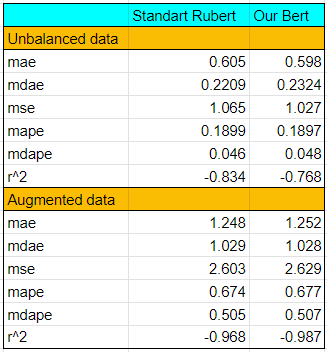